reference: https://colab.research.google.com/drive/1ryOQ6hXxCidM_mGN0Yrf4BbjUtpyCxgy#scrollTo=bKPrbgel8xr-

In [1]:
from PKGNN import PKGNN_v1
from utils import get_fe_crystal
import torch
from tqdm import tqdm
from data import get_dataloader, PK_Dataset, draw_hotmap
from utils import create_F_from_input
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

c:\Users\HuTia\Documents\Coding\venv\MachineLearning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load model
def load_model(state_dict_path, **model_kwargs):
    model = PKGNN_v1(**model_kwargs)
    model.load_state_dict(torch.load(state_dict_path))
    return model


In [46]:
np.linspace(5.0, 3.0, num=5)

array([5. , 4.5, 4. , 3.5, 3. ])

In [20]:
# draw map

# load model
ckpt_dir = 'checkpoints/20230206-19-37/'
state_dict_path = ckpt_dir + 'best-model-params.pt'
model = load_model(state_dict_path, crystal = get_fe_crystal())
batch_size = 64

# load data
train_loader, test_loader = get_dataloader(batch_size = batch_size)


x = []
y = []
P00_true = []
P01_true = []
P00_pred = []
P01_pred = []

with torch.no_grad():
    err = torch.zeros(9, dtype = torch.float32)
    for F_00, F_01, s_true in tqdm(chain(train_loader, test_loader)):
        F = create_F_from_input(F_00, F_01)
        s_pred = model(F)
        x.append(F_00)
        y.append(F_01)
        P00_true.append(s_true[:, 0])
        P01_true.append(s_true[:, 1])
        P00_pred.append(s_pred[:, 0])
        P01_pred.append(s_pred[:, 1])

# res save path 
res_path = ckpt_dir + 'res.npz'
x = torch.concat(x).numpy()
y = torch.concat(y).numpy()
P00_true = torch.concat(P00_true).numpy()
P01_true = torch.concat(P01_true).numpy()
P00_pred = torch.concat(P00_pred).numpy()
P01_pred = torch.concat(P01_pred).numpy()


with open(res_path, 'wb') as f:
    np.savez(
        f,
        F_00 = x, 
        F_01 = y, 
        P00_true = P00_true, 
        P01_true = P01_true, 
        P00_pred = P00_pred, 
        P01_pred = P01_pred
        )



c:\Users\HuTia\Documents\Coding\venv\MachineLearning\lib\site-packages\torch\jit\_check.py:181: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn("The TorchScript type system doesn't support "
157it [00:37,  4.20it/s]


['F_00', 'F_01', 'P00_true', 'P01_true', 'P00_pred', 'P01_pred']
(10000,)


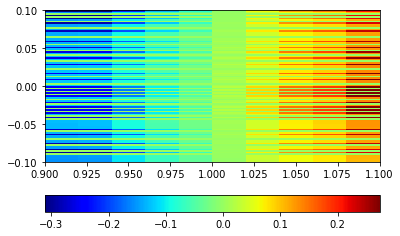

In [36]:

# restore res 
res_path = ckpt_dir + 'res.npz'
res = np.load(res_path)
print(res.files)
# draw P00 true
plt.hist2d(
    x = res['F_00'],
    y = res['F_01'], 
    bins=[np.arange(0.9,1.102,0.02),np.arange(-0.1,0.102,0.002)], 
    weights = res['P00_true'], 
    cmap = 'jet'
)
plt.colorbar(location = 'bottom')
print(res['F_00'].shape)

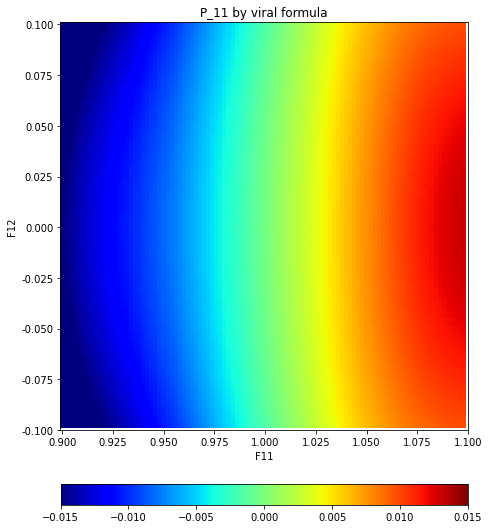

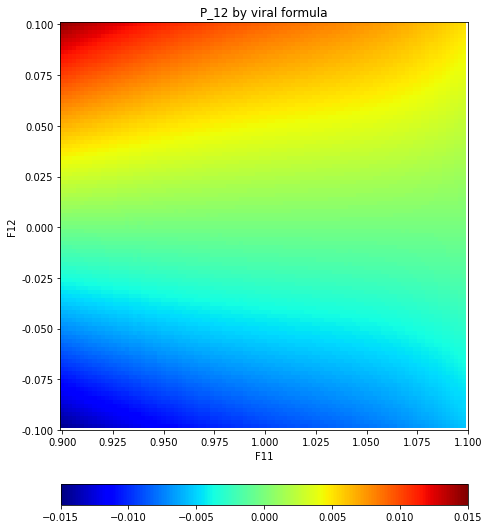

In [2]:
from PKGNN import PKGNN_v1
from utils import get_fe_crystal
import torch
from tqdm import tqdm
from data import get_dataloader, PK_Dataset, draw_hotmap
from utils import create_F_from_input
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# 直接使用原始数据画图
# ckpt_dir = 'checkpoints/20230206-19-37/'
# state_dict_path = ckpt_dir + 'best-model-params.pt'
# model = load_model(state_dict_path, crystal = get_fe_crystal())
# batch_size = 64

# load data
dataset = PK_Dataset('data/strain-stress-uniform.dat')
data1 = dataset.stress[:, 0].reshape(100, 100).T[::-1, :]
data2 = dataset.stress[:, 1].reshape(100, 100).T[::-1, :]
draw_hotmap(data1, title = "P_11 by viral formula", save = 'data/P_11_viral.png')
draw_hotmap(data2, title = "P_12 by viral formula", save = 'data/P_12_viral.png')

# plt.figure(figsize=(10,10))

# plt.imshow(data, cmap = 'jet', vmin = -0.015, vmax = 0.015)
# plt.xticks(np.arange(0.0, 101, 12.5), [f'{val:.3f}' for val in np.arange(0.9, 1.11, 0.025)])
# plt.xlabel("F11")
# plt.yticks(np.arange(0.0, 101, 12.5), [f'{val:.3f}' for val in np.arange(0.1, -0.11, -0.025)])
# plt.ylabel("F12")
# plt.colorbar(location = 'bottom', shrink = 0.73, pad = 0.1)
# plt.title("P_11 by viral formula")


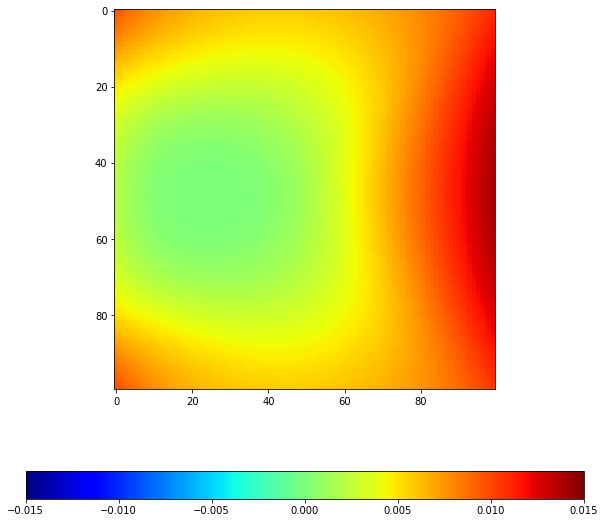

In [49]:
# ckpt_dir = 'checkpoints/20230206-19-37/'
# state_dict_path = ckpt_dir + 'best-model-params.pt'
# model = load_model(state_dict_path, crystal = get_fe_crystal())
# batch_size = 64

# dl = DataLoader(dataset, batch_size = batch_size, shuffle=False)
# P00_pred = []
# P01_pred = []

# with torch.no_grad():
#     err = torch.zeros(9, dtype = torch.float32)
#     for F_00, F_01, s_true in tqdm(dl):
#         F = create_F_from_input(F_00, F_01)
#         s_pred = model(F)
#         P00_pred.append(s_pred[:, 0])
#         P01_pred.append(s_pred[:, 1])

# P00_pred = torch.concat(P00_pred).numpy()
# P01_pred = torch.concat(P01_pred).numpy()

# with open(res_path, 'wb') as f:
#     np.savez(
#         f,
#         P00_pred = P00_pred, 
#         P01_pred = P01_pred
#         )

res = np.load(res_path)
plt.figure(figsize=(10,10))
plt.imshow(res['P00_pred'].reshape(100, 100).T, cmap = 'jet', vmin = -0.015, vmax = 0.015)
plt.colorbar(location = 'bottom')

In [7]:
 # count time for one batch infer

Wall time: 120 ms


In [9]:
# aclc log error, time batch infer

# load model
state_dict_path = 'checkpoints/20230206-19-37/best-model-params.pt'
model = load_model(state_dict_path, crystal = get_fe_crystal())
batch_size = 64

# load data
train_loader, test_loader = get_dataloader(batch_size = batch_size)

with torch.no_grad():
    err = torch.zeros(9, dtype = torch.float32)
    for F_00, F_01, s_true in tqdm(test_loader):
        F = create_F_from_input(F_00, F_01)
        s_pred = model(F)
        err += (s_pred - s_true).abs().mean(0)
    err = torch.log10(err / len(test_loader))
    print("mean log err = ", err)

%time s_pred = model(F)

c:\Users\HuTia\Documents\Coding\venv\MachineLearning\lib\site-packages\torch\jit\_check.py:181: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn("The TorchScript type system doesn't support "
100%|██████████| 32/32 [00:08<00:00,  3.76it/s]


mean log err =  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan])
Wall time: 105 ms
